<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lab | Customer Analysis Final Round

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.
1. Problem (case study)

Data Description.

Goal.
2. Getting Data

Read the .csv file.

3. Cleaning/Wrangling/EDA

Change headers names.

Deal with NaN values.

Categorical Features.

Numerical Features.

Exploration.

4. Processing Data

Dealing with outliers.

Normalization.

Encoding Categorical Data.


Splitting into train set and test set.

5. Modeling

Apply model.

6. Model Validation

R2.

MSE.

RMSE.

MAE.

7. Reporting

Present results.

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import statistics as stat
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
#Estadarizamos headers
def clean_headers(x):
  x.columns = [i.lower().replace(' ','_') for i in x.columns]
  x['effective_to_date'] = pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x

In [4]:
data = clean_headers(data)

In [5]:
data.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [8]:
data.shape

(9134, 24)

In [9]:
data_num = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(include=np.object)

In [11]:
data_num.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [10]:
#Checamos datos de las columnas 
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  print(i,positive)

customer_lifetime_value 0.0
income 25.366761550251805
monthly_premium_auto 0.0
months_since_last_claim 3.437705276987081
months_since_policy_inception 0.9086927961462667
number_of_open_complaints 79.39566455003285
number_of_policies 0.0
total_claim_amount 0.0


In [12]:
#Vemos que number of open complaints nos da mas de un 75% de informacion vacia, por lo tanto se borrará 
#y las demas columnas se llenaran con su promedio 
def data_clean(x):
  x = x.drop('number_of_open_complaints',axis=1)
  for i in x.columns:
    x[i] = x[i].replace(0,stat.mean(x[i]))
  return x 

In [13]:
#Se le aplica la función creada
data_num = data_clean(data_num)

In [15]:
data_num.head(10)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2763.519279,56274.000000,69,32.000,5.0,1,384.811147
1,6979.535903,37657.380009,94,13.000,42.0,8,1131.464935
2,12887.431650,48767.000000,108,18.000,38.0,2,566.472247
3,7645.861827,37657.380009,106,18.000,65.0,7,529.881344
4,2813.692575,43836.000000,73,12.000,44.0,1,138.130879
5,8256.297800,62902.000000,69,14.000,94.0,2,159.383042
6,5380.898636,55350.000000,67,15.097,13.0,9,321.600000
7,7216.100311,37657.380009,101,15.097,68.0,4,363.029680
8,24127.504020,14072.000000,71,13.000,3.0,2,511.200000
9,7388.178085,28812.000000,93,17.000,7.0,8,425.527834


In [16]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   float64
 4   months_since_policy_inception  9134 non-null   float64
 5   number_of_policies             9134 non-null   int64  
 6   total_claim_amount             9134 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 499.6 KB


In [17]:
#checamos si existen nulos en la data categorica 
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [18]:
#borramos customer
data_cat = data_cat.drop('customer',axis=1)

In [22]:
for i in data_cat: 
 print(i,data_cat[i].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [23]:
data_cat = data_cat.drop('renew_offer_type',axis=1)

In [24]:
data_cat = data_cat.drop('sales_channel',axis=1)

In [25]:
data_cat.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Four-Door Car,Medsize
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Four-Door Car,Medsize


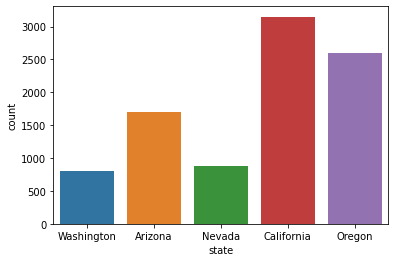

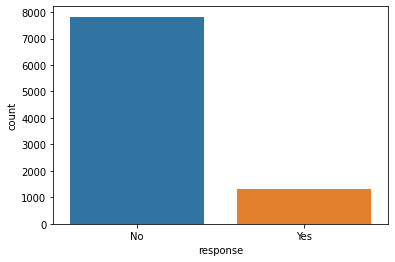

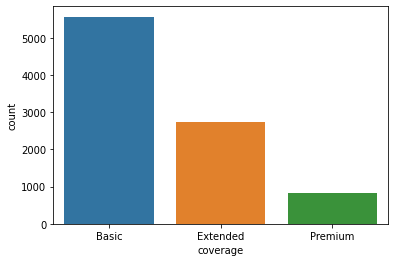

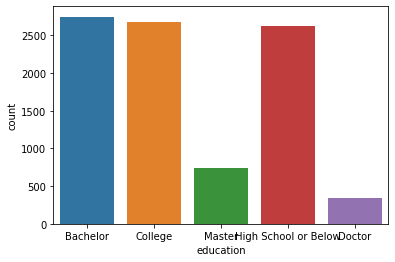

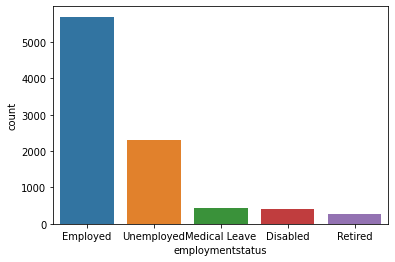

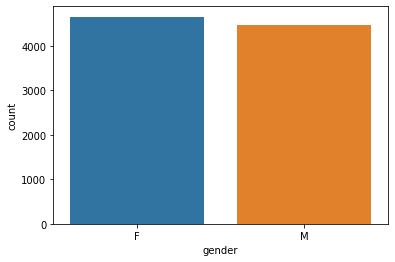

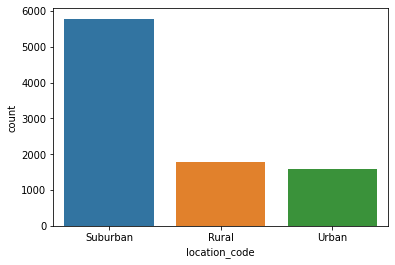

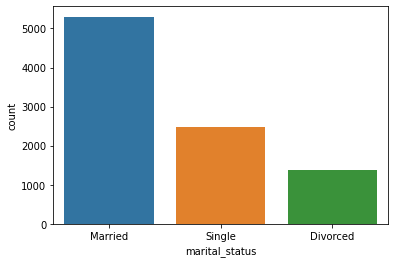

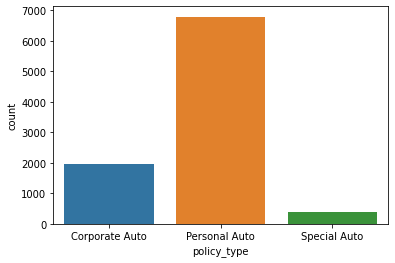

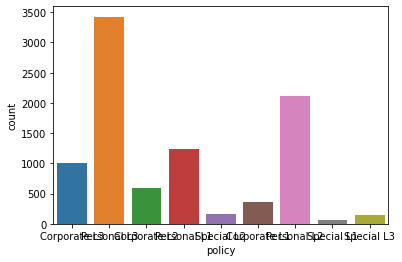

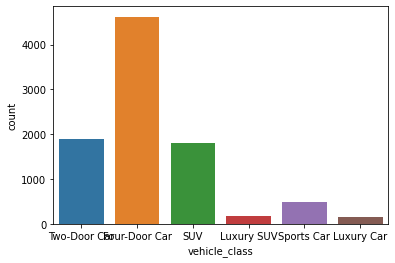

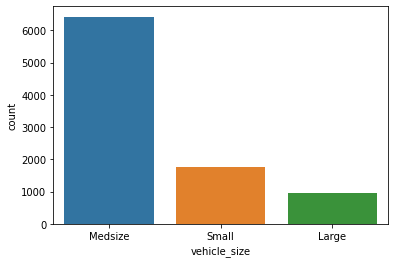

In [43]:
for i in data_cat:
  sns.countplot(data=data_cat,x=i)
  plt.show()

In [44]:
data_num_corr = data_num.corr()

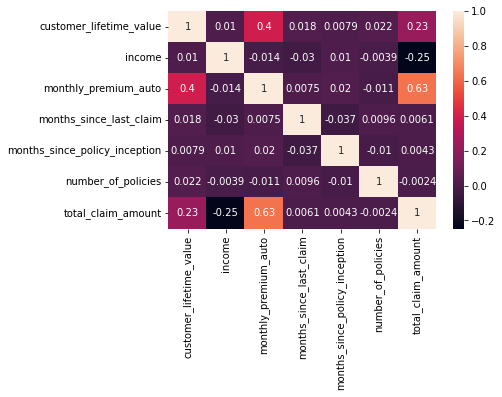

In [48]:
#vemos que no hya una correlacion fuerte entre los features y el target
sns.heatmap(data_num_corr,annot=True)

In [ ]:
#boxcot
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  if positive > 0:
    data_num[i] = np.where(data_num[i]<0,0,data_num[i]) 
    data_num[i] = data_num[i].replace(0,np.sum(data_num[i])/len(data_num[i]))

In [ ]:
for i in data_num:
  data_num[i],lmbda = stats.boxcox(data_num[i])

In [ ]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount
0,2.703839,42.114983,0.685347,10.809132,3.017301,0.000000,33.035752
1,2.754926,38.346277,0.685871,5.783269,18.770387,1.424359,56.357614
2,2.780772,40.735368,0.686039,7.311427,17.380225,0.607328,40.071789
3,2.759125,38.346277,0.686018,7.311427,26.144855,1.363462,38.763252
4,2.704995,39.734641,0.685461,5.448624,19.451130,0.000000,19.560154
...,...,...,...,...,...,...,...
9129,2.801170,44.579684,0.685461,7.311427,33.067968,0.607328,23.588905
9130,2.711030,33.627127,0.685606,6.106927,13.703207,0.000000,32.792951
9131,2.762062,38.346277,0.685725,4.363742,17.026248,0.607328,47.263726
9132,2.758397,33.751319,0.685898,11.248499,1.667661,0.893486,44.225147


In [49]:
for i in data_num:
  #print(i)
  #checamos el % de los negativos de las columnas, ya que BoxCox es preferible aplicarla cuando toda la dta es positiva
  positive = 100*len(data_num[data_num[i]<=0])/len(data_num[i])
  print(i,positive)

customer_lifetime_value 0.0
income 0.0
monthly_premium_auto 0.0
months_since_last_claim 0.0
months_since_policy_inception 0.0
number_of_policies 0.0
total_claim_amount 0.0


In [50]:
data_num = data_num.drop('number_of_policies',axis=1)

In [51]:
data_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.000000,69,32.0,5.0,384.811147
1,6979.535903,37657.380009,94,13.0,42.0,1131.464935
2,12887.431650,48767.000000,108,18.0,38.0,566.472247
3,7645.861827,37657.380009,106,18.0,65.0,529.881344
4,2813.692575,43836.000000,73,12.0,44.0,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18.0,89.0,198.234764
9130,3096.511217,21604.000000,79,14.0,28.0,379.200000
9131,8163.890428,37657.380009,85,9.0,37.0,790.784983
9132,7524.442436,21941.000000,96,34.0,3.0,691.200000


In [52]:
data2 = pd.concat([data_cat,data_num],axis=1)

In [54]:
data2.head(10)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Two-Door Car,Medsize,2763.519279,56274.000000,69,32.000,5.0,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Four-Door Car,Medsize,6979.535903,37657.380009,94,13.000,42.0,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Two-Door Car,Medsize,12887.431650,48767.000000,108,18.000,38.0,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,SUV,Medsize,7645.861827,37657.380009,106,18.000,65.0,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Four-Door Car,Medsize,2813.692575,43836.000000,73,12.000,44.0,138.130879
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L3,Two-Door Car,Medsize,8256.297800,62902.000000,69,14.000,94.0,159.383042
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Four-Door Car,Medsize,5380.898636,55350.000000,67,15.097,13.0,321.600000
7,Arizona,No,Premium,Master,Unemployed,M,Urban,Single,Corporate Auto,Corporate L3,Four-Door Car,Medsize,7216.100311,37657.380009,101,15.097,68.0,363.029680
8,Oregon,Yes,Basic,Bachelor,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Four-Door Car,Medsize,24127.504020,14072.000000,71,13.000,3.0,511.200000
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Special Auto,Special L2,Four-Door Car,Medsize,7388.178085,28812.000000,93,17.000,7.0,425.527834


In [57]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   response                       9134 non-null   object 
 2   coverage                       9134 non-null   object 
 3   education                      9134 non-null   object 
 4   employmentstatus               9134 non-null   object 
 5   gender                         9134 non-null   object 
 6   location_code                  9134 non-null   object 
 7   marital_status                 9134 non-null   object 
 8   policy_type                    9134 non-null   object 
 9   policy                         9134 non-null   object 
 10  vehicle_class                  9134 non-null   object 
 11  vehicle_size                   9134 non-null   object 
 12  customer_lifetime_value        9134 non-null   f

In [58]:
#X-y split 
y = data2['total_claim_amount']
X = data2.drop('total_claim_amount',axis=1)

In [59]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

In [60]:
transformer=StandardScaler().fit(X_num)
x_stan=transformer.transform(X_num)

In [61]:
transformer =Normalizer().fit(X_num)
x_norm= transformer.transform(X_num)

In [63]:
#porque ya vimos que no hay tantos valores categoricos diferentes 
encoder=OneHotEncoder(drop='first').fit(X_cat)
encoder=encoder.transform(X_cat).toarray()
encoder

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [ ]:
labels=preprocessing.OrdinalEncoder().fit(X_cat).transform(X_cat)
labels

array([[4., 0., 0., ..., 2., 5., 1.],
       [0., 0., 1., ..., 5., 0., 1.],
       [2., 0., 2., ..., 5., 5., 1.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 1., ..., 4., 0., 0.],
       [1., 0., 1., ..., 2., 5., 1.]])

In [72]:
X=np.concatenate((X_num,encoder),axis=1)

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [74]:
#Haciendo el modelo lineal, con una regresión
lm=linear_model.LinearRegression()

#Aquí ya ajustamos la maquinaria rpevia
model=lm.fit(X_train,y_train)

In [75]:
predictions=lm.predict(X_test)

In [76]:
r2_score(y_test,predictions)

0.7615042937566123

In [77]:
#MAE
import sklearn.metrics as metrics
metrics.mean_absolute_error(y_test,predictions)

99.12334461909589

In [78]:
#MSE
mse =mean_squared_error(y_test,predictions)
mse

20866.35500631403

In [79]:
#RMSE
np.sqrt(mse)

144.45191243564076